In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('bank.csv', delimiter=';')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

In [5]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [6]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

In [7]:
X = pd.get_dummies(df[features])
print(X)

      age  balance  day  duration  campaign  pdays  previous  y  job_admin.  \
0      30     1787   19        79         1     -1         0  0           0   
1      33     4789   11       220         1    339         4  0           0   
2      35     1350   16       185         1    330         1  0           0   
3      30     1476    3       199         4     -1         0  0           0   
4      59        0    5       226         1     -1         0  0           0   
...   ...      ...  ...       ...       ...    ...       ... ..         ...   
4516   33     -333   30       329         5     -1         0  0           0   
4517   57    -3313    9       153         1     -1         0  0           0   
4518   57      295   19       151        11     -1         0  0           0   
4519   28     1137    6       129         4    211         3  0           0   
4520   44     1136    3       345         2    249         7  0           0   

      job_blue-collar  ...  month_jun  month_mar  m

In [8]:
y = df['y']



In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:

# Build the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 1.00

Confusion Matrix:
[[807   0]
 [  0  98]]


In [12]:
print('\nClassification Report:')
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      1.00      1.00        98

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



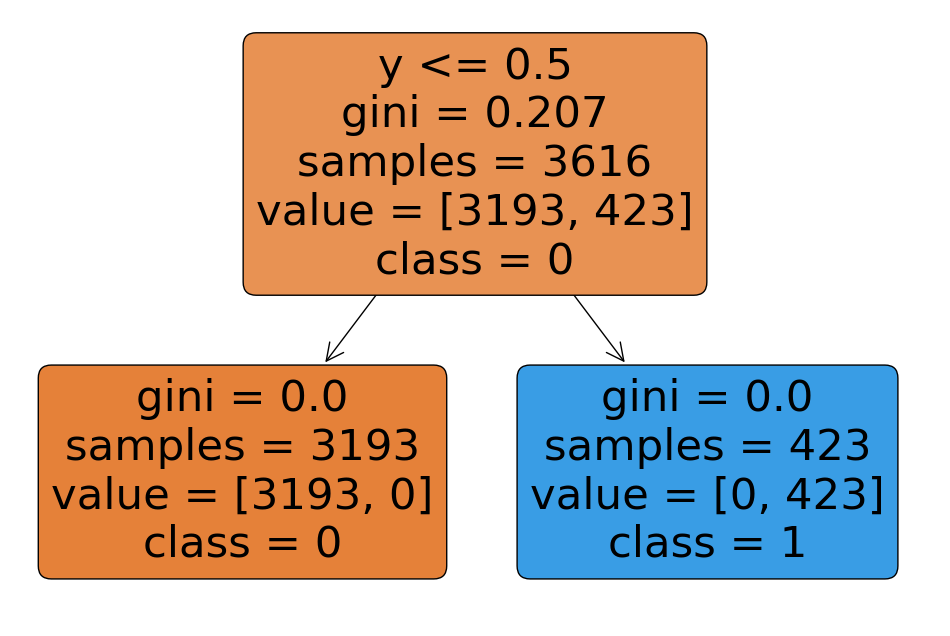

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Convert unique values in 'y' to strings
class_names = df['y'].unique().astype(str).tolist()

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=class_names, filled=True, rounded=True)
plt.show()